In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow.keras.layers import *
#from tensorflow.keras.models import *
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

# Helper libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def s(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<2*tf.ones(tf.shape(x))),
                 (-3.*(x-1.)**3 +3.*(x-1.)**2 + 3*(x-1.)+1.)/6.,
                 tf.zeros(tf.shape(x))
                )
    
    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*2<=x, x<3*tf.ones(tf.shape(x))),
                 (3*(x-2)**3 - 6*(x-2)**2 + 4. )/6.,
                 tf.zeros(tf.shape(x))
                )

    y3 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 ( 4. -x)**3/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<2*tf.ones(tf.shape(x))),
                 x**3/6,
                 tf.zeros(tf.shape(x))
                )
    
    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*2<=x, x==x ), 
                  2./3.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/6.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  2.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/12, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/12.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/12.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  1.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/6.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  2.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3 - tf.ones(tf.shape(x))
    
    return y

def partition_weights(n,n0):
    p0 = n0*n
    y = np.zeros((n,p0))
    for i in range(n):
        y[i,i*n0:(i+1)*n0] = 1.
    return y 

def partition_bias(n,n0):
    p0 = n0*n
    return (np.arange(0.,p0)%n0)    

def spline_function_(n,m,c0,u0):
    """Cubic spline"""
    
    d0 = 3 # if the degree is 3 then use the activation function s3(), if it's 2 then use s()
 
    n0 = c0 + d0
    p0 = n0*n

    inn = tf.keras.layers.Input(shape=(n,))

    l00 = tf.keras.layers.Dense(activation=s,
                                units=p0,
                                use_bias=True,
                                trainable=False,
                                kernel_initializer=tf.constant_initializer(c0*partition_weights(n,n0)),
                                bias_initializer=tf.constant_initializer(d0 - partition_bias(n,n0)) 
                               )(inn)
    
    out = tf.keras.layers.Dense(units=m,
                                use_bias=False,
                                trainable=True,
                                kernel_initializer=tf.constant_initializer(u0)
                               )(l00)

    model = tf.keras.Model(inputs=inn, 
                           outputs= out
                          )
    return model


print(tf.__version__)

2.1.0


# Reveries

In [2]:
dx = 0.001
index0 = 3
x1 = np.arange(0.,1.+dx,dx)
y1 = np.sin(2.*np.pi*x1)

2022-04-18 23:45:28.420678: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-04-18 23:45:28.443379: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2799925000 Hz
2022-04-18 23:45:28.443754: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564962593150 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-18 23:45:28.443773: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-18 23:45:28.443927: I tensorflow/core/common_runtime/process_util.cc:147] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 48
Trainable params: 16
Non-trainable params: 32
_________________________________________________________________


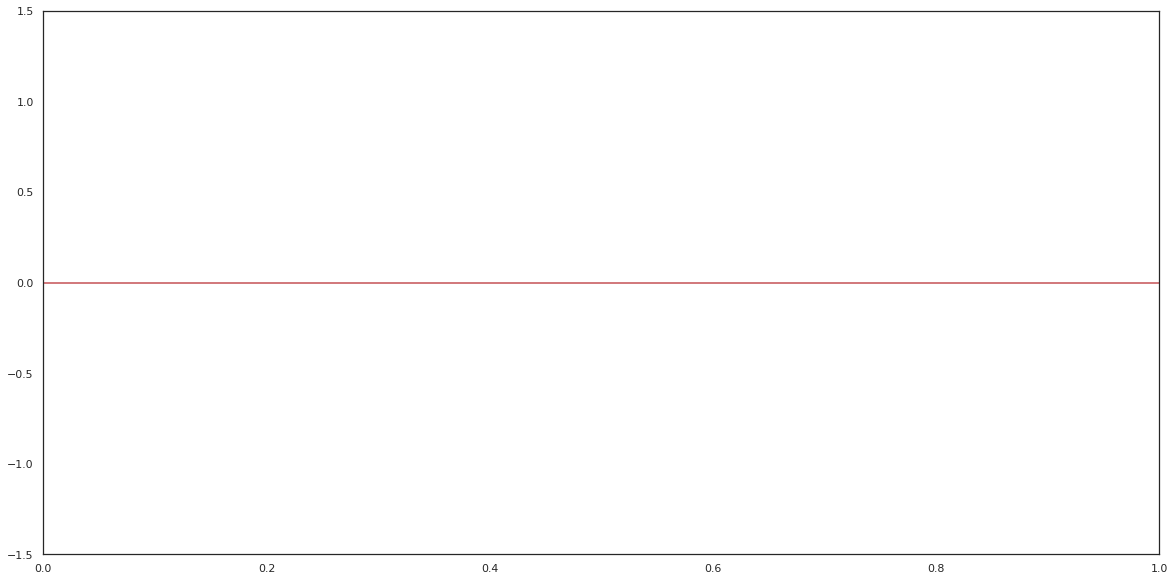

In [3]:
# Initialise a model
model = spline_function_(1,1,13,0.)

# Print model summary
model.summary()

# Adjust weights for testing purposes, comment out otherwise
#weights = model.get_weights()
#print(weights)
#weights[2][73] = 1.
#model.set_weights(weights)


output1 = model.predict(x1).flatten()

plt.figure(figsize=(20,10))
#plt.plot(x0,y0,color='blue',label='True Function')
#plt.scatter(train_inputs,train_output,label='Noisy Training Data',color='green',s=1.5)
plt.plot(x1, output1,label='Untrained Neural Network',color='r')
#plt.scatter(x0,output2,label='Trained Neural Network',color='g')
#plt.scatter(x0, dendrite(x0*6-1.5) )
plt.ylim(-1.5,1.5)
plt.xlim(0,1)
#plt.legend()
plt.show()

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss=tf.keras.losses.mean_squared_error,metrics=['MSE'])

In [5]:
rt = np.random.RandomState(1789)
x2 = rt.rand(1000)
y2 = np.sin(2.*np.pi*x2)

In [6]:
model.fit(x2, y2, epochs=10,verbose=1)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 714us/sample - loss: 0.3591 - MSE: 0.3591
Epoch 2/10
1000/1000 [==============================] - 0s 109us/sample - loss: 0.1472 - MSE: 0.1472
Epoch 3/10
1000/1000 [==============================] - 0s 89us/sample - loss: 0.0530 - MSE: 0.0530
Epoch 4/10
1000/1000 [==============================] - 0s 106us/sample - loss: 0.0177 - MSE: 0.0177
Epoch 5/10
1000/1000 [==============================] - 0s 118us/sample - loss: 0.0054 - MSE: 0.0054
Epoch 6/10
1000/1000 [==============================] - 0s 161us/sample - loss: 0.0016 - MSE: 0.0016
Epoch 7/10
1000/1000 [==============================] - 0s 96us/sample - loss: 4.7820e-04 - MSE: 4.7820e-04
Epoch 8/10
1000/1000 [==============================] - 0s 120us/sample - loss: 1.5570e-04 - MSE: 1.5570e-04
Epoch 9/10
1000/1000 [==============================] - 0s 116us/sample - loss: 6.2033e-05 - MSE: 6.2033e-05
Epoch 10/10
1000/1000 [========================

In [7]:
output2 = model.predict(x1)

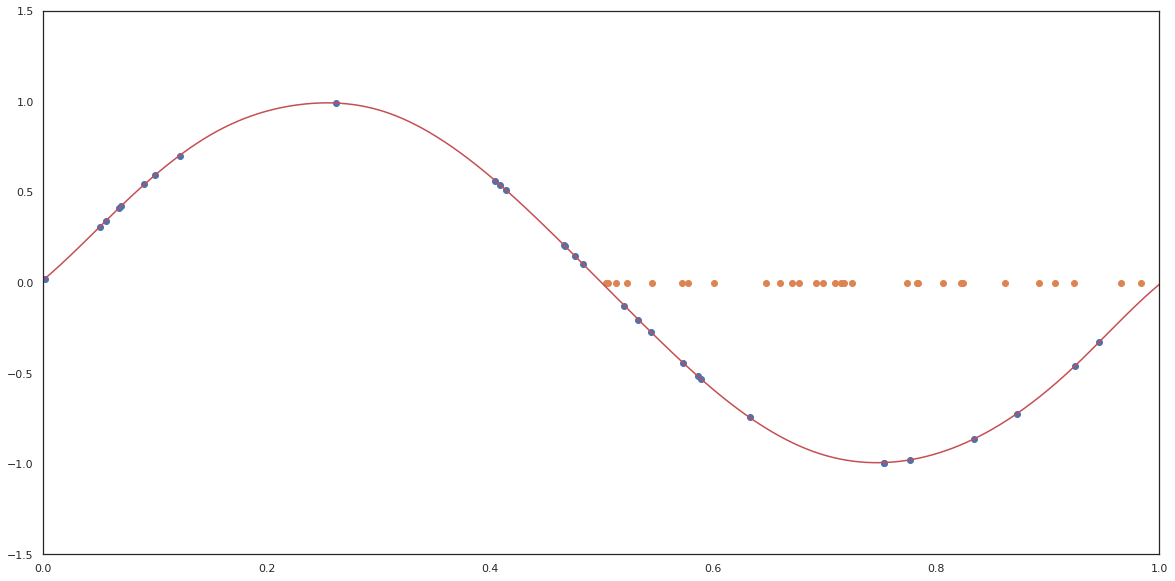

In [8]:
rs1 = np.random.RandomState(1189)
x3 = rs1.rand(30)
y3 = model.predict(x3)

rs2 = np.random.RandomState(1149)
x4 = 0.5*rs2.rand(30)+0.5
y4 = 0*x4


plt.figure(figsize=(20,10))
#plt.plot(x0,y0,color='blue',label='True Function')
#plt.scatter(train_inputs,train_output,label='Noisy Training Data',color='green',s=1.5)
plt.plot(x1, output2,label='Untrained Neural Network',color='r')
#plt.scatter(x2,y2,label='Trained Neural Network',color='g')

plt.scatter(x3,y3)
plt.scatter(x4,y4)
#plt.scatter(x0, dendrite(x0*6-1.5) )
plt.ylim(-1.5,1.5)
plt.xlim(0,1)
#plt.legend()
plt.show()

In [9]:
probability_new_data = 0.5
num_data = 5000

train_inputs_new_data = x4.copy()
train_labels_new_data = y4.copy()

index_choice =  np.random.randint(0,len(train_labels_new_data),num_data)

new_input_samples = train_inputs_new_data[index_choice]
new_label_samples = train_labels_new_data[index_choice]

# Random Model Generation
#mem_input_samples = np.random.rand(num_data).astype('float32')
#mem_label_samples = model.predict(mem_input_samples).reshape(num_data)

train_inputs_mem = x3.copy()
train_labels_mem = y3.flatten()

index_choice2 =  np.random.randint(0,len(train_inputs_mem),num_data)
mem_input_samples = train_inputs_mem[index_choice2]
mem_label_samples = train_labels_mem[index_choice2]

reveries_input = np.zeros(num_data).astype('float32')
reveries_label = np.zeros(num_data).astype('float32')

reverie_constructor = np.random.choice([True,False],
                                num_data,
                                p=[probability_new_data,1.-probability_new_data]
                               )

reveries_input[reverie_constructor] = new_input_samples[reverie_constructor]
reveries_label[reverie_constructor] = new_label_samples[reverie_constructor]

reveries_input[np.logical_not(reverie_constructor)] = mem_input_samples[np.logical_not(reverie_constructor)]
reveries_label[np.logical_not(reverie_constructor)] = mem_label_samples[np.logical_not(reverie_constructor)]

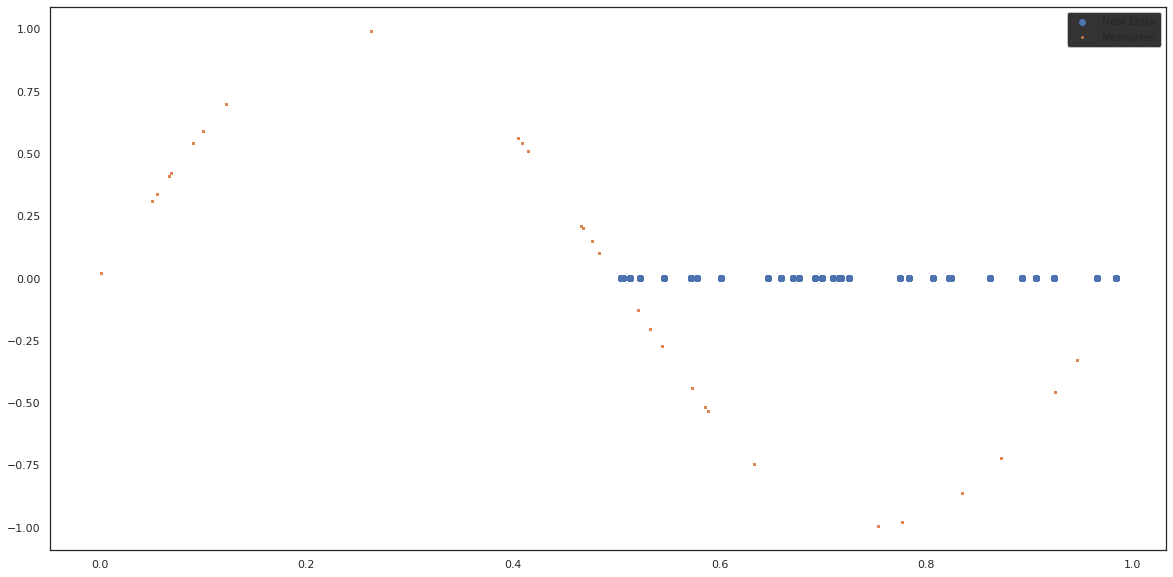

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(new_input_samples,new_label_samples,label='New Data')
plt.scatter(mem_input_samples,mem_label_samples,label='Memories',s=3.)
plt.legend()
plt.show()

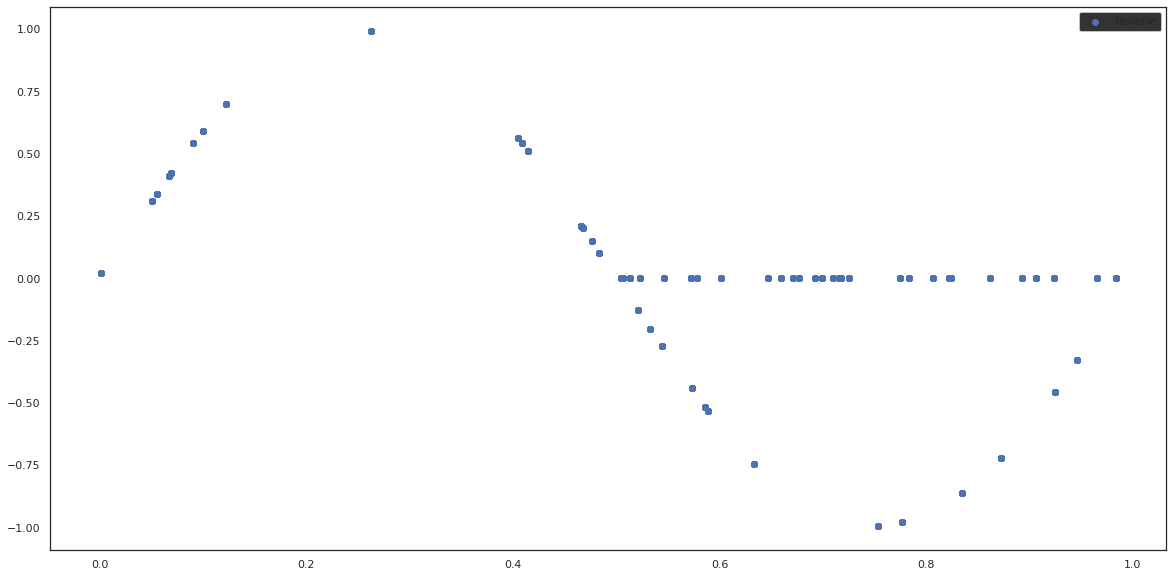

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(reveries_input,reveries_label,label='Reverie')
plt.legend()
plt.show()

In [12]:
model.fit(reveries_input, reveries_label, epochs=20,verbose=1)

Train on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 1s 182us/sample - loss: 0.0876 - MSE: 0.0876
Epoch 2/20
5000/5000 [==============================] - 0s 92us/sample - loss: 0.0641 - MSE: 0.0641
Epoch 3/20
5000/5000 [==============================] - 0s 91us/sample - loss: 0.0627 - MSE: 0.0627
Epoch 4/20
5000/5000 [==============================] - 0s 83us/sample - loss: 0.0625 - MSE: 0.0625
Epoch 5/20
5000/5000 [==============================] - 0s 85us/sample - loss: 0.0623 - MSE: 0.0623
Epoch 6/20
5000/5000 [==============================] - 0s 91us/sample - loss: 0.0622 - MSE: 0.0622
Epoch 7/20
5000/5000 [==============================] - 0s 90us/sample - loss: 0.0623 - MSE: 0.0623
Epoch 8/20
5000/5000 [==============================] - 0s 81us/sample - loss: 0.0620 - MSE: 0.0620
Epoch 9/20
5000/5000 [==============================] - 0s 93us/sample - loss: 0.0625 - MSE: 0.0625
Epoch 10/20
5000/5000 [==============================] - 0s 93us/sample - los

In [13]:
output3 = model.predict(x1)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

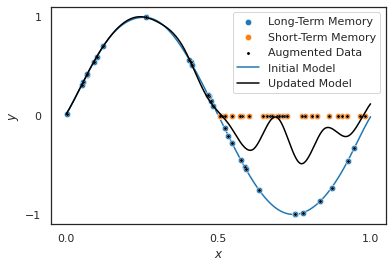

In [14]:


sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_initial_model = pd.DataFrame(dict(x=x1, y=output2.flatten()))
df_long_mem = pd.DataFrame(dict(x=x3, y=y3.flatten()))
df_shrt_mem = pd.DataFrame(dict(x=x4, y=y4))
df_reveries = pd.DataFrame(dict(x=np.concatenate((x3,x4)),y=np.concatenate((y3.flatten(),y4))))
df_final_model = pd.DataFrame(dict(x=x1, y=output3.flatten()))

fig = plt.figure(20)

g = sns.scatterplot(data=df_long_mem, x="x", y="y",
                    color=sns.color_palette("tab10")[0],
                    zorder=10,label="Long-Term Memory",s=40)
g.set_xticks(np.arange(0.,1.5,0.5))
g.set_yticks(np.arange(-1.,1.5,1.))

sns.scatterplot(data=df_shrt_mem, x="x", y="y",
                    color=sns.color_palette("tab10")[1],
                    zorder=10,label="Short-Term Memory",s=40)

sns.scatterplot(data=df_reveries, x="x", y="y",color='black',zorder=40,
                label="Augmented Data",s=10)

m = sns.lineplot(x='x',y='y',data=df_initial_model,\
                 color=sns.color_palette("tab10")[0],
                 linewidth=1.5,zorder=5,label="Initial Model")
#sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

sns.lineplot(x='x',y='y',data=df_final_model,\
                 color='black',
                 linewidth=1.5,zorder=50,label="Updated Model")

#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

fig.gca().set(xlabel=r'$x$', ylabel=r'$y$')
#fig.savefig("iclr_paper/reveries_0.png", close = True, verbose = True, dpi=500)

/home/heinrich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "close" which is no longer supported as of 3.3 and will become an error in 3.6
/home/heinrich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "verbose" which is no longer supported as of 3.3 and will become an error in 3.6


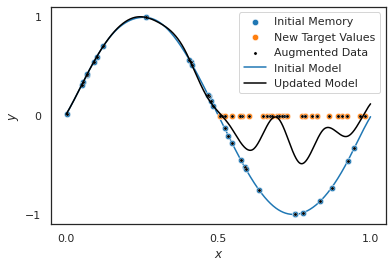

In [16]:


sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_initial_model = pd.DataFrame(dict(x=x1, y=output2.flatten()))
df_long_mem = pd.DataFrame(dict(x=x3, y=y3.flatten()))
df_shrt_mem = pd.DataFrame(dict(x=x4, y=y4))
df_reveries = pd.DataFrame(dict(x=np.concatenate((x3,x4)),y=np.concatenate((y3.flatten(),y4))))
df_final_model = pd.DataFrame(dict(x=x1, y=output3.flatten()))

fig = plt.figure(20)

g = sns.scatterplot(data=df_long_mem, x="x", y="y",
                    color=sns.color_palette("tab10")[0],
                    zorder=10,label="Initial Memory",s=40)
g.set_xticks(np.arange(0.,1.5,0.5))
g.set_yticks(np.arange(-1.,1.5,1.))

sns.scatterplot(data=df_shrt_mem, x="x", y="y",
                    color=sns.color_palette("tab10")[1],
                    zorder=10,label="New Target Values",s=40)

sns.scatterplot(data=df_reveries, x="x", y="y",color='black',zorder=40,
                label="Augmented Data",s=10)

m = sns.lineplot(x='x',y='y',data=df_initial_model,\
                 color=sns.color_palette("tab10")[0],
                 linewidth=1.5,zorder=5,label="Initial Model")
#sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

sns.lineplot(x='x',y='y',data=df_final_model,\
                 color='black',
                 linewidth=1.5,zorder=50,label="Updated Model")

#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

fig.gca().set(xlabel=r'$x$', ylabel=r'$y$')
fig.savefig("KASAM_Paper_Theory_Plots/pseudo_rehearsal.png", close = True, verbose = True, dpi=500)